# Introduction

Google Trends gives us an estimate of search volume. Let's explore if search popularity relates to other kinds of data. Perhaps there are patterns in Google's search volume and the price of Bitcoin or a hot stock like Tesla. Perhaps search volume for the term "Unemployment Benefits" can tell us something about the actual unemployment rate?

Data Sources: <br>
<ul>
<li> <a href="https://fred.stlouisfed.org/series/UNRATE/">Unemployment Rate from FRED</a></li>
<li> <a href="https://trends.google.com/trends/explore">Google Trends</a> </li>  
<li> <a href="https://finance.yahoo.com/quote/TSLA/history?p=TSLA">Yahoo Finance for Tesla Stock Price</a> </li>    
<li> <a href="https://finance.yahoo.com/quote/BTC-USD/history?p=BTC-USD">Yahoo Finance for Bitcoin Stock Price</a> </li>
</ul>

# Import Statements

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Read the Data

Download and add the .csv files to the same folder as your notebook.

In [3]:
df_tesla = pd.read_csv('/content/drive/MyDrive/1 Dev/2 Personal Projects /data_science_py/data_science_4/TESLA Search Trend vs Price.csv')

df_btc_search = pd.read_csv('/content/drive/MyDrive/1 Dev/2 Personal Projects /data_science_py/data_science_4/Bitcoin Search Trend.csv')
df_btc_price = pd.read_csv('/content/drive/MyDrive/1 Dev/2 Personal Projects /data_science_py/data_science_4/Daily Bitcoin Price.csv')

df_unemployment = pd.read_csv('/content/drive/MyDrive/1 Dev/2 Personal Projects /data_science_py/data_science_4/UE Benefits Search vs UE Rate 2004-19.csv')

# Data Exploration

### Tesla

**Challenge**: <br>
<ul>
<li>What are the shapes of the dataframes? </li>
<li>How many rows and columns? </li>
<li>What are the column names? </li>
<li>Complete the f-string to show the largest/smallest number in the search data column</li>
<li>Try the <code>.describe()</code> function to see some useful descriptive statistics</li>
<li>What is the periodicity of the time series data (daily, weekly, monthly)? </li>
<li>What does a value of 100 in the Google Trend search popularity actually mean?</li>
</ul>

In [10]:
# Get shapes of the DataFrames
shapes = {
    "Tesla": df_tesla.shape,
    "Bitcoin Search": df_btc_search.shape,
    "Bitcoin Price": df_btc_price.shape,
    "Unemployment": df_unemployment.shape,
}

print("Shapes of the DataFrames:", shapes)

Shapes of the DataFrames: {'Tesla': (124, 3), 'Bitcoin Search': (73, 2), 'Bitcoin Price': (2204, 3), 'Unemployment': (181, 3)}


In [17]:
# Get column names
column_names = {
    "Tesla": df_tesla.columns.tolist(),
    "Bitcoin Search": df_btc_search.columns.tolist(),
    "Bitcoin Price": df_btc_price.columns.tolist(),
    "Unemployment": df_unemployment.columns.tolist(),
}

print("Column Names:", column_names)


Column Names: {'Tesla': ['MONTH', 'TSLA_WEB_SEARCH', 'TSLA_USD_CLOSE'], 'Bitcoin Search': ['MONTH', 'BTC_NEWS_SEARCH'], 'Bitcoin Price': ['DATE', 'CLOSE', 'VOLUME'], 'Unemployment': ['MONTH', 'UE_BENEFITS_WEB_SEARCH', 'UNRATE']}


In [13]:
# Find largest and smallest values in the search data columns
largest_tesla = df_tesla['TSLA_WEB_SEARCH'].max()
smallest_tesla = df_tesla['TSLA_WEB_SEARCH'].min()
largest_btc = df_btc_search['BTC_NEWS_SEARCH'].max()
smallest_btc = df_btc_search['BTC_NEWS_SEARCH'].min()

print(f"Largest Tesla Search Trend: {largest_tesla}, Smallest Tesla Search Trend: {smallest_tesla}")
print(f"Largest Bitcoin Search Trend: {largest_btc}, Smallest Bitcoin Search Trend: {smallest_btc}")


Largest Tesla Search Trend: 31, Smallest Tesla Search Trend: 2
Largest Bitcoin Search Trend: 100, Smallest Bitcoin Search Trend: 3


### Unemployment Data

In [15]:
import pandas as pd

# Descriptive statistics
describe_tesla = df_tesla.describe()
describe_btc_search = df_btc_search.describe()
describe_btc_price = df_btc_price.describe()
describe_unemployment = df_unemployment.describe()

# Create a list of DataFrames
dfs = [describe_tesla, describe_btc_search, describe_btc_price, describe_unemployment]

# Create a list of DataFrame names
df_names = ['Tesla', 'Bitcoin Search', 'Bitcoin Price', 'Unemployment']

# Concatenate the DataFrames and display as a table
descriptive_stats_table = pd.concat(dfs, keys=df_names, axis=1)
display(descriptive_stats_table)

Tesla                 Bitcoin Search Bitcoin Price  \
      TSLA_WEB_SEARCH TSLA_USD_CLOSE BTC_NEWS_SEARCH         CLOSE   
count      124.000000     124.000000       73.000000   2203.000000   
mean         8.725806      50.962145       15.013699   4429.421245   
std          5.870332      65.908389       15.146959   4148.150071   
min          2.000000       3.896000        3.000000    178.102997   
25%          3.750000       7.352500        5.000000    433.629502   
50%          8.000000      44.653000       14.000000   3637.520020   
75%         12.000000      58.991999       18.000000   7997.372803   
max         31.000000     498.320007      100.000000  19497.400391   

                              Unemployment              
             VOLUME UE_BENEFITS_WEB_SEARCH      UNRATE  
count  2.203000e+03             181.000000  181.000000  
mean   8.043622e+09              35.110497    6.217680  
std    1.176529e+10              20.484925    1.891859  
min    5.914570e+06              14.000000    3.700000  
25%    6.029915e+07              21.000000    4.700000  
50%    2.018890e+09              26.000000    5.400000  
75%    1.322478e+10              45.000000    7.800000  
max    7.415677e+10             100.000000   10.000000

In [18]:
# Checking periodicity
periodicity_tesla = pd.to_datetime(df_tesla['MONTH']).diff().mode()[0]
periodicity_btc_search = pd.to_datetime(df_btc_search['MONTH']).diff().mode()[0]
periodicity_btc_price = pd.to_datetime(df_btc_price['DATE']).diff().mode()[0]
periodicity_unemployment = pd.to_datetime(df_unemployment['MONTH']).diff().mode()[0]

print("Periodicity of Tesla:", periodicity_tesla)
print("Periodicity of Bitcoin Search:", periodicity_btc_search)
print("Periodicity of Bitcoin Price:", periodicity_btc_price)
print("Periodicity of Unemployment:", periodicity_unemployment)


Periodicity of Tesla: 31 days 00:00:00
Periodicity of Bitcoin Search: 31 days 00:00:00
Periodicity of Bitcoin Price: 1 days 00:00:00
Periodicity of Unemployment: 31 days 00:00:00


In [19]:
# Checking periodicity
periodicity_tesla = pd.to_datetime(df_tesla['MONTH']).diff().mode()[0]
periodicity_btc_search = pd.to_datetime(df_btc_search['MONTH']).diff().mode()[0]
periodicity_btc_price = pd.to_datetime(df_btc_price['DATE']).diff().mode()[0]
periodicity_unemployment = pd.to_datetime(df_unemployment['MONTH']).diff().mode()[0]

print("Periodicity of Tesla:", periodicity_tesla)
print("Periodicity of Bitcoin Search:", periodicity_btc_search)
print("Periodicity of Bitcoin Price:", periodicity_btc_price)
print("Periodicity of Unemployment:", periodicity_unemployment)


Periodicity of Tesla: 31 days 00:00:00
Periodicity of Bitcoin Search: 31 days 00:00:00
Periodicity of Bitcoin Price: 1 days 00:00:00
Periodicity of Unemployment: 31 days 00:00:00


# Data Cleaning

### Check for Missing Values

**Challenge**: Are there any missing values in any of the dataframes? If so, which row/rows have missing values? How many missing values are there?

In [21]:
# Check for missing values in each DataFrame
missing_tesla = df_tesla.isnull().sum()
missing_unemployment = df_unemployment.isnull().sum()
missing_btc_search = df_btc_search.isnull().sum()

# Identify rows with missing values
tesla_missing_rows = df_tesla[df_tesla.isnull().any(axis=1)]
unemployment_missing_rows = df_unemployment[df_unemployment.isnull().any(axis=1)]
btc_search_missing_rows = df_btc_search[df_btc_search.isnull().any(axis=1)]

# Print results
print(f'Missing values for Tesla:\n{missing_tesla}\n')
print(f'Rows with missing values in Tesla:\n{tesla_missing_rows}\n')
print(f'Total missing values in Tesla: {tesla_missing_rows.isnull().sum().sum()}\n')

print(f'Missing values for Unemployment:\n{missing_unemployment}\n')
print(f'Rows with missing values in Unemployment:\n{unemployment_missing_rows}\n')
print(f'Total missing values in Unemployment: {unemployment_missing_rows.isnull().sum().sum()}\n')

print(f'Missing values for BTC Search:\n{missing_btc_search}\n')
print(f'Rows with missing values in BTC Search:\n{btc_search_missing_rows}\n')
print(f'Total missing values in BTC Search: {btc_search_missing_rows.isnull().sum().sum()}\n')


Missing values for Tesla:
MONTH              0
TSLA_WEB_SEARCH    0
TSLA_USD_CLOSE     0
dtype: int64

Rows with missing values in Tesla:
Empty DataFrame
Columns: [MONTH, TSLA_WEB_SEARCH, TSLA_USD_CLOSE]
Index: []

Total missing values in Tesla: 0

Missing values for Unemployment:
MONTH                     0
UE_BENEFITS_WEB_SEARCH    0
UNRATE                    0
dtype: int64

Rows with missing values in Unemployment:
Empty DataFrame
Columns: [MONTH, UE_BENEFITS_WEB_SEARCH, UNRATE]
Index: []

Total missing values in Unemployment: 0

Missing values for BTC Search:
MONTH              0
BTC_NEWS_SEARCH    0
dtype: int64

Rows with missing values in BTC Search:
Empty DataFrame
Columns: [MONTH, BTC_NEWS_SEARCH]
Index: []

Total missing values in BTC Search: 0



In [23]:
# Function to check for missing values
def check_missing_values(df, name):
    missing_values_count = df.isnull().sum().sum()  # Total missing values
    missing_values_details = df.isnull().sum()  # Missing values per column
    missing_rows = df[df.isnull().any(axis=1)]  # Rows with any missing values

    print(f'Missing values for {name}:\n{missing_values_details}\n')
    print(f'Total missing values in {name}: {missing_values_count}\n')

    if not missing_rows.empty:
        print(f'Rows with missing values in {name}:\n{missing_rows}\n')
    else:
        print(f'No missing values in {name}.\n')

    return missing_rows

# Check for missing values in all DataFrames
tesla_missing_rows = check_missing_values(df_tesla, "Tesla")
unemployment_missing_rows = check_missing_values(df_unemployment, "Unemployment")
btc_search_missing_rows = check_missing_values(df_btc_search, "Bitcoin Search")
btc_price_missing_rows = check_missing_values(df_btc_price, "Bitcoin Price")


Missing values for Tesla:
MONTH              0
TSLA_WEB_SEARCH    0
TSLA_USD_CLOSE     0
dtype: int64

Total missing values in Tesla: 0

No missing values in Tesla.

Missing values for Unemployment:
MONTH                     0
UE_BENEFITS_WEB_SEARCH    0
UNRATE                    0
dtype: int64

Total missing values in Unemployment: 0

No missing values in Unemployment.

Missing values for Bitcoin Search:
MONTH              0
BTC_NEWS_SEARCH    0
dtype: int64

Total missing values in Bitcoin Search: 0

No missing values in Bitcoin Search.

Missing values for Bitcoin Price:
DATE      0
CLOSE     1
VOLUME    1
dtype: int64

Total missing values in Bitcoin Price: 2

Rows with missing values in Bitcoin Price:
            DATE  CLOSE  VOLUME
2148  2020-08-04    NaN     NaN



**Challenge**: Remove any missing values that you found.

In [25]:
# Remove rows with missing values
df_tesla_cleaned = df_tesla.dropna()
df_unemployment_cleaned = df_unemployment.dropna()
df_btc_search_cleaned = df_btc_search.dropna()
df_btc_price_cleaned = df_btc_price.dropna()

# Print the shapes of the cleaned DataFrames
print("Shapes after removing missing values:")
print(f'Tesla: {df_tesla_cleaned.shape}')
print(f'Unemployment: {df_unemployment_cleaned.shape}')
print(f'Bitcoin Search: {df_btc_search_cleaned.shape}')
print(f'Bitcoin Price: {df_btc_price_cleaned.shape}')


Shapes after removing missing values:
Tesla: (124, 3)
Unemployment: (181, 3)
Bitcoin Search: (73, 2)
Bitcoin Price: (2203, 3)


### Convert Strings to DateTime Objects

**Challenge**: Check the data type of the entries in the DataFrame MONTH or DATE columns. Convert any strings in to Datetime objects. Do this for all 4 DataFrames. Double check if your type conversion was successful.

In [26]:
# Function to check and convert date columns
def convert_to_datetime(df, date_column, name):
    print(f'Data types in {name} before conversion:\n{df.dtypes}\n')

    # Convert the date column to datetime
    df[date_column] = pd.to_datetime(df[date_column], errors='coerce')

    # Check the data types after conversion
    print(f'Data types in {name} after conversion:\n{df.dtypes}\n')

    return df

In [28]:
# Convert date columns in all DataFrames
df_tesla = convert_to_datetime(df_tesla, 'MONTH', "Tesla")
df_unemployment = convert_to_datetime(df_unemployment, 'MONTH', "Unemployment")
df_btc_search = convert_to_datetime(df_btc_search, 'MONTH', "Bitcoin Search")
df_btc_price = convert_to_datetime(df_btc_price, 'DATE', "Bitcoin Price")

# Display info for each DataFrame
dataframes = [df_tesla, df_unemployment, df_btc_search, df_btc_price]
names = ["Tesla", "Unemployment", "Bitcoin Search", "Bitcoin Price"]

for df, name in zip(dataframes, names):
    print(f"DataFrame: {name}")
    df.info()  # Display DataFrame info for better readability
    print("\n" + "=" * 20 + "\n")  # Separator for clarity

Data types in Tesla before conversion:
MONTH              datetime64[ns]
TSLA_WEB_SEARCH             int64
TSLA_USD_CLOSE            float64
dtype: object

Data types in Tesla after conversion:
MONTH              datetime64[ns]
TSLA_WEB_SEARCH             int64
TSLA_USD_CLOSE            float64
dtype: object

Data types in Unemployment before conversion:
MONTH                     datetime64[ns]
UE_BENEFITS_WEB_SEARCH             int64
UNRATE                           float64
dtype: object

Data types in Unemployment after conversion:
MONTH                     datetime64[ns]
UE_BENEFITS_WEB_SEARCH             int64
UNRATE                           float64
dtype: object

Data types in Bitcoin Search before conversion:
MONTH              datetime64[ns]
BTC_NEWS_SEARCH             int64
dtype: object

Data types in Bitcoin Search after conversion:
MONTH              datetime64[ns]
BTC_NEWS_SEARCH             int64
dtype: object

Data types in Bitcoin Price before conversion:
DATE      date

### Converting from Daily to Monthly Data

[Pandas .resample() documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html) <br>

In [49]:
# Resample Bitcoin price data to monthly frequency
df_btc_price.resample('M', on='DATE').last()


<ipython-input-49-c127d46dbb89>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_btc_price.resample('M', on='DATE').last()


,CLOSE,VOLUME
DATE,,
2014-09-30,386.944000,3.470730e+07
2014-10-31,338.321014,1.254540e+07
2014-11-30,378.046997,9.194440e+06
2014-12-31,320.192993,1.394290e+07
2015-01-31,217.464005,2.334820e+07
...,...,...
2020-05-31,9461.058594,2.777329e+10
2020-06-30,9137.993164,1.573580e+10
2020-07-31,11323.466797,2.316047e+10


In [50]:
df_btc_monthly = df_btc_price.resample('M', on='DATE').last()

<ipython-input-50-aae66ff3dd78>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_btc_monthly = df_btc_price.resample('M', on='DATE').last()


# Data Visualisation

### Notebook Formatting & Style Helpers

In [34]:
import matplotlib.dates as mdates


### Tesla Stock Price v.s. Search Volume

**Challenge:** Plot the Tesla stock price against the Tesla search volume using a line chart and two different axes. Label one axis 'TSLA Stock Price' and the other 'Search Trend'.

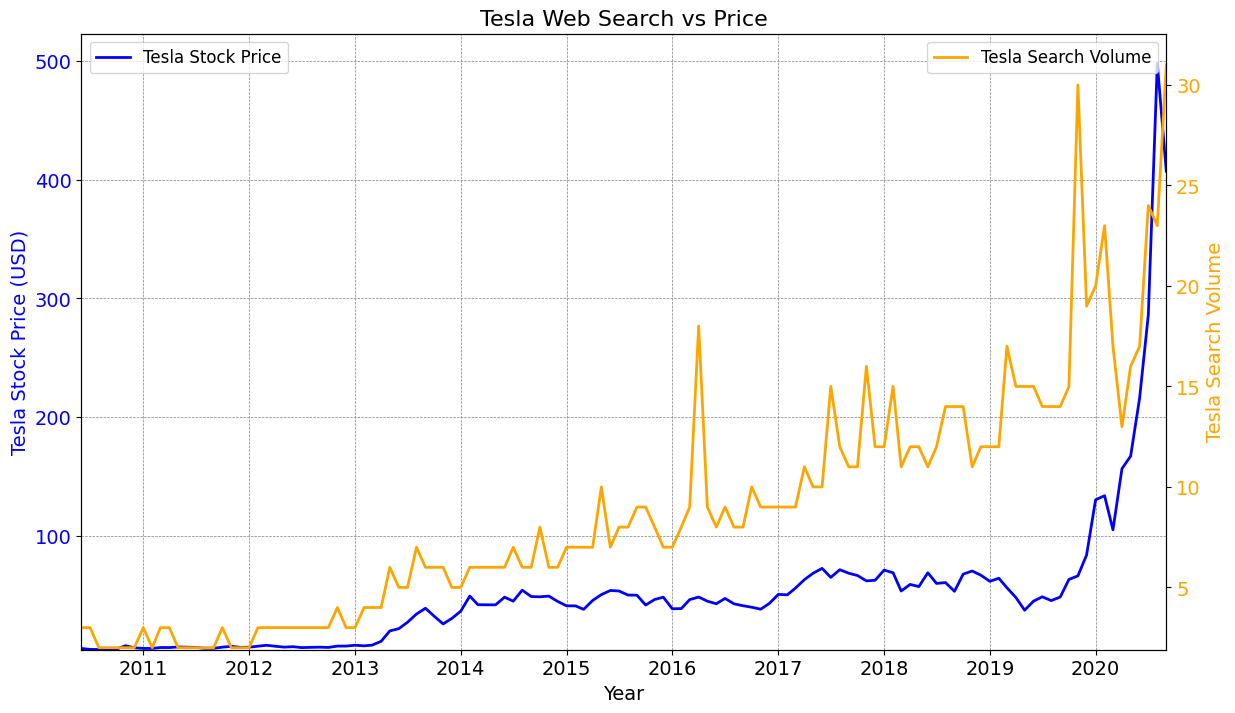

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Create a larger figure and axis with increased size
fig, ax1 = plt.subplots(figsize=(14, 8))

# Plot Tesla stock price on the primary y-axis with thicker lines
ax1.set_xlabel('Year', fontsize=14)
ax1.set_ylabel('Tesla Stock Price (USD)', color='blue', fontsize=14)
ax1.plot(df_tesla['MONTH'], df_tesla['TSLA_USD_CLOSE'], color='blue', label='Tesla Stock Price', linewidth=2)
ax1.tick_params(axis='y', labelcolor='blue', labelsize=14)

# Set limits for the primary y-axis
ax1.set_ylim(df_tesla['TSLA_USD_CLOSE'].min() * 0.95, df_tesla['TSLA_USD_CLOSE'].max() * 1.05)

# Create a secondary y-axis for search volume
ax2 = ax1.twinx()
ax2.set_ylabel('Tesla Search Volume', color='orange', fontsize=14)
ax2.plot(df_tesla['MONTH'], df_tesla['TSLA_WEB_SEARCH'], color='orange', label='Tesla Search Volume', linewidth=2)
ax2.tick_params(axis='y', labelcolor='orange', labelsize=14)

# Set limits for the secondary y-axis
ax2.set_ylim(df_tesla['TSLA_WEB_SEARCH'].min() * 0.95, df_tesla['TSLA_WEB_SEARCH'].max() * 1.05)

# Set x-axis limits
ax1.set_xlim(df_tesla['MONTH'].min(), df_tesla['MONTH'].max())

# Increase font size for x-ticks
ax1.tick_params(axis='x', labelsize=14)

# Add title with increased font size
plt.title('Tesla Web Search vs Price', fontsize=16)

# Add legends
ax1.legend(loc='upper left', fontsize=12)
ax2.legend(loc='upper right', fontsize=12)

# Adjust the grid
ax1.grid(color='gray', linestyle='--', linewidth=0.5)

# Use Date Locators for x-axis to show only the year
ax1.xaxis.set_major_locator(mdates.YearLocator())  # Set major ticks to every year
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Format the date labels to show only the year

# Set vertical alignment of x-axis labels
plt.xticks(rotation=90, ha='center', va='center')

# Set the DPI for better resolution
plt.savefig('/content/tesla_web_search_vs_price.png', dpi=300)

# Show the plot
plt.show()


**Challenge**: Add colours to style the chart. This will help differentiate the two lines and the axis labels. Try using one of the blue [colour names](https://matplotlib.org/3.1.1/gallery/color/named_colors.html) for the search volume and a HEX code for a red colour for the stock price.
<br>
<br>
Hint: you can colour both the [axis labels](https://matplotlib.org/3.3.2/api/text_api.html#matplotlib.text.Text) and the [lines](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D) on the chart using keyword arguments (kwargs).  

**Challenge**: Make the chart larger and easier to read.
1. Increase the figure size (e.g., to 14 by 8).
2. Increase the font sizes for the labels and the ticks on the x-axis to 14.
3. Rotate the text on the x-axis by 45 degrees.
4. Make the lines on the chart thicker.
5. Add a title that reads 'Tesla Web Search vs Price'
6. Keep the chart looking sharp by changing the dots-per-inch or [DPI value](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.figure.html).
7. Set minimum and maximum values for the y and x axis. Hint: check out methods like [set_xlim()](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.set_xlim.html).
8. Finally use [plt.show()](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.show.html) to display the chart below the cell instead of relying on the automatic notebook output.

How to add tick formatting for dates on the x-axis.

### Bitcoin (BTC) Price v.s. Search Volume

**Challenge**: Create the same chart for the Bitcoin Prices vs. Search volumes. <br>
1. Modify the chart title to read 'Bitcoin News Search vs Resampled Price' <br>
2. Change the y-axis label to 'BTC Price' <br>
3. Change the y- and x-axis limits to improve the appearance <br>
4. Investigate the [linestyles](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html ) to make the BTC price a dashed line <br>
5. Investigate the [marker types](https://matplotlib.org/3.2.1/api/markers_api.html) to make the search datapoints little circles <br>
6. Were big increases in searches for Bitcoin accompanied by big increases in the price?

In [54]:
# Check the column names in df_btc_monthly
print(df_btc_monthly.columns)


Index(['CLOSE', 'VOLUME'], dtype='object')


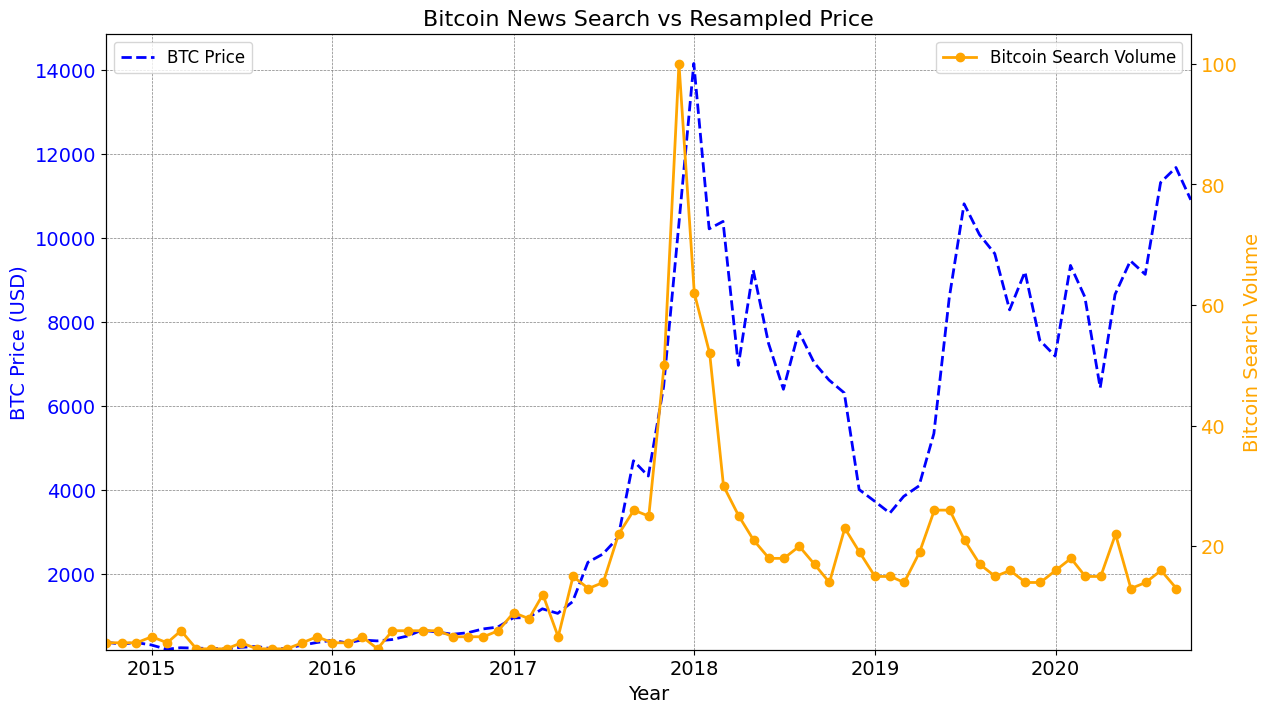

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Create a larger figure and axis with increased size
fig, ax1 = plt.subplots(figsize=(14, 8))

# Plot Bitcoin closing price on the primary y-axis with thicker dashed lines
ax1.set_xlabel('Year', fontsize=14)
ax1.set_ylabel('BTC Price (USD)', color='blue', fontsize=14)
ax1.plot(df_btc_monthly.index, df_btc_monthly['CLOSE'], color='blue', label='BTC Price', linewidth=2, linestyle='--')  # Assuming the index is set to date
ax1.tick_params(axis='y', labelcolor='blue', labelsize=14)

# Set limits for the primary y-axis
ax1.set_ylim(df_btc_monthly['CLOSE'].min() * 0.95, df_btc_monthly['CLOSE'].max() * 1.05)

# Create a secondary y-axis for search volume
ax2 = ax1.twinx()
ax2.set_ylabel('Bitcoin Search Volume', color='orange', fontsize=14)
ax2.plot(df_btc_search['MONTH'], df_btc_search['BTC_NEWS_SEARCH'], color='orange', label='Bitcoin Search Volume',
         linewidth=2, marker='o')  # Use circles for search data points
ax2.tick_params(axis='y', labelcolor='orange', labelsize=14)

# Set limits for the secondary y-axis
ax2.set_ylim(df_btc_search['BTC_NEWS_SEARCH'].min() * 0.95, df_btc_search['BTC_NEWS_SEARCH'].max() * 1.05)

# Set x-axis limits
ax1.set_xlim(df_btc_monthly.index.min(), df_btc_monthly.index.max())

# Increase font size for x-ticks
ax1.tick_params(axis='x', labelsize=14)

# Add title with increased font size
plt.title('Bitcoin News Search vs Resampled Price', fontsize=16)

# Add legends
ax1.legend(loc='upper left', fontsize=12)
ax2.legend(loc='upper right', fontsize=12)

# Adjust the grid
ax1.grid(color='gray', linestyle='--', linewidth=0.5)

# Use Date Locators for x-axis to show only the year
ax1.xaxis.set_major_locator(mdates.YearLocator())  # Set major ticks to every year
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Format the date labels to show only the year

# Set vertical alignment of x-axis labels
plt.xticks(rotation=90, ha='center', va='center')

# Set the DPI for better resolution
plt.savefig('/content/bitcoin_news_search_vs_price.png', dpi=300)

# Show the plot
plt.show()


### Unemployement Benefits Search vs. Actual Unemployment in the U.S.

**Challenge** Plot the search for "unemployment benefits" against the unemployment rate.
1. Change the title to: Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate <br>
2. Change the y-axis label to: FRED U/E Rate <br>
3. Change the axis limits <br>
4. Add a grey [grid](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.grid.html) to the chart to better see the years and the U/E rate values. Use dashes for the line style<br>
5. Can you discern any seasonality in the searches? Is there a pattern?

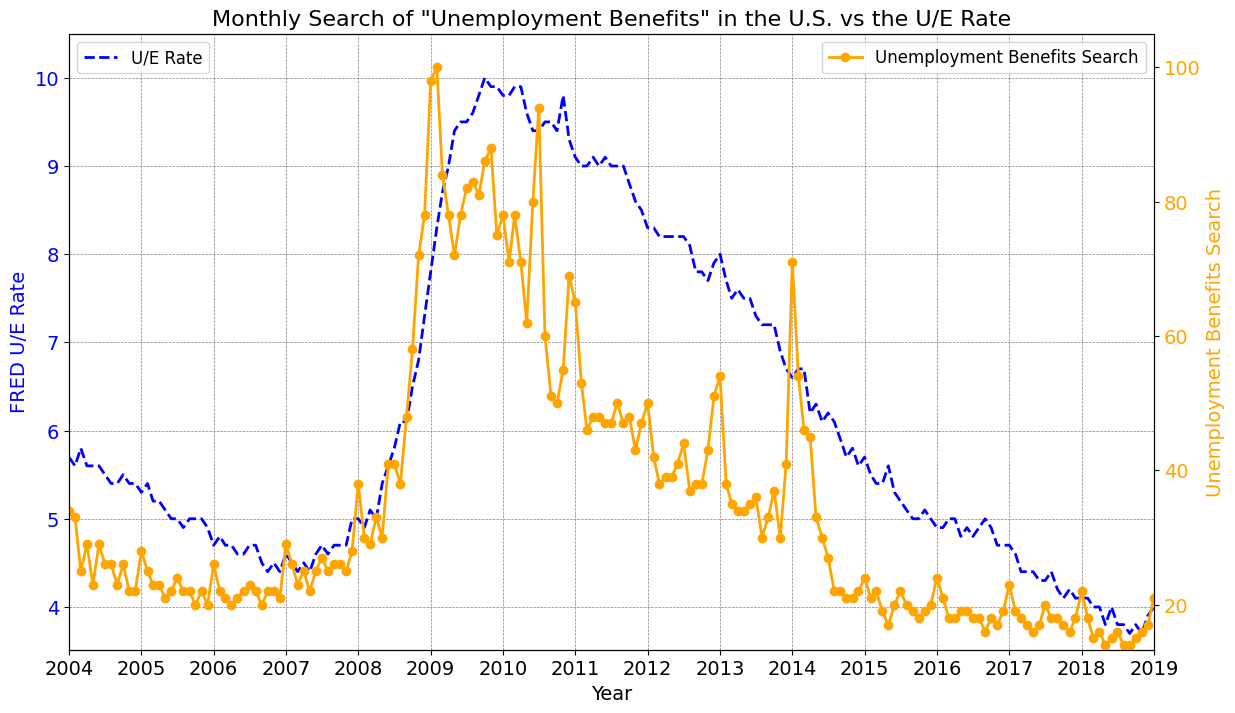

In [57]:
# Assuming the unemployment DataFrame is named df_unemployment
# Create a larger figure and axis with increased size
fig, ax1 = plt.subplots(figsize=(14, 8))

# Plot Unemployment Rate on the primary y-axis
ax1.set_xlabel('Year', fontsize=14)
ax1.set_ylabel('FRED U/E Rate', color='blue', fontsize=14)
ax1.plot(df_unemployment['MONTH'], df_unemployment['UNRATE'], color='blue', label='U/E Rate',
         linewidth=2, linestyle='--')  # Dashed line style
ax1.tick_params(axis='y', labelcolor='blue', labelsize=14)

# Set limits for the primary y-axis
ax1.set_ylim(df_unemployment['UNRATE'].min() * 0.95, df_unemployment['UNRATE'].max() * 1.05)

# Create a secondary y-axis for search volume
ax2 = ax1.twinx()
ax2.set_ylabel('Unemployment Benefits Search', color='orange', fontsize=14)
ax2.plot(df_unemployment['MONTH'], df_unemployment['UE_BENEFITS_WEB_SEARCH'], color='orange',
         label='Unemployment Benefits Search', linewidth=2, marker='o')  # Circles for search data points
ax2.tick_params(axis='y', labelcolor='orange', labelsize=14)

# Set limits for the secondary y-axis
ax2.set_ylim(df_unemployment['UE_BENEFITS_WEB_SEARCH'].min() * 0.95,
             df_unemployment['UE_BENEFITS_WEB_SEARCH'].max() * 1.05)

# Set x-axis limits
ax1.set_xlim(df_unemployment['MONTH'].min(), df_unemployment['MONTH'].max())

# Increase font size for x-ticks
ax1.tick_params(axis='x', labelsize=14)

# Add title with increased font size
plt.title('Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate', fontsize=16)

# Add legends
ax1.legend(loc='upper left', fontsize=12)
ax2.legend(loc='upper right', fontsize=12)

# Add a grey grid to the chart
ax1.grid(color='grey', linestyle='--', linewidth=0.5)

# Use Date Locators for x-axis to show years
ax1.xaxis.set_major_locator(mdates.YearLocator())  # Set major ticks to every year
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Format the date labels to show only the year

# Set vertical alignment of x-axis labels
plt.xticks(rotation=90, ha='center', va='center')

# Set the DPI for better resolution
plt.savefig('/content/unemployment_benefits_vs_rate.png', dpi=300)

# Show the plot
plt.show()


**Challenge**: Calculate the 3-month or 6-month rolling average for the web searches. Plot the 6-month rolling average search data against the actual unemployment. What do you see in the chart? Which line moves first?


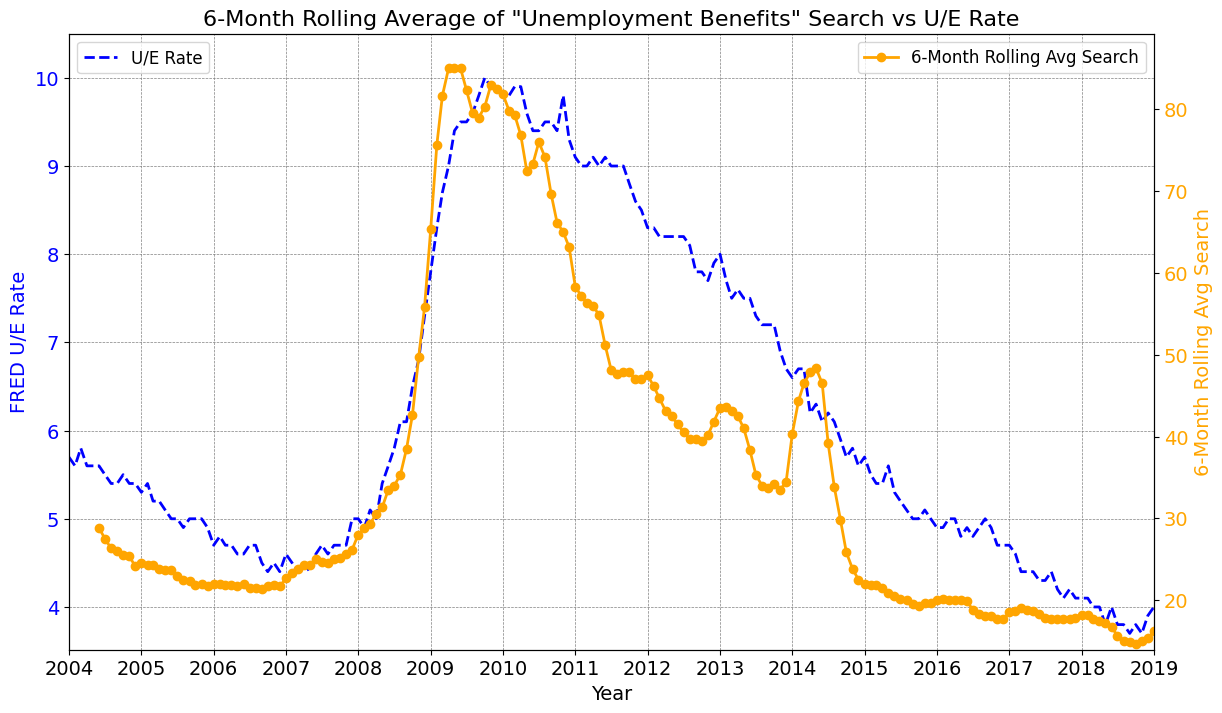

In [58]:
# Calculate the 6-month rolling average for the web searches
df_unemployment['Rolling_Avg_Search'] = df_unemployment['UE_BENEFITS_WEB_SEARCH'].rolling(window=6).mean()

# Create a new figure for the rolling average plot
fig, ax1 = plt.subplots(figsize=(14, 8))

# Plot the actual unemployment rate
ax1.set_xlabel('Year', fontsize=14)
ax1.set_ylabel('FRED U/E Rate', color='blue', fontsize=14)
ax1.plot(df_unemployment['MONTH'], df_unemployment['UNRATE'], color='blue', label='U/E Rate',
         linewidth=2, linestyle='--')  # Dashed line style
ax1.tick_params(axis='y', labelcolor='blue', labelsize=14)

# Set limits for the primary y-axis
ax1.set_ylim(df_unemployment['UNRATE'].min() * 0.95, df_unemployment['UNRATE'].max() * 1.05)

# Create a secondary y-axis for the rolling average
ax2 = ax1.twinx()
ax2.set_ylabel('6-Month Rolling Avg Search', color='orange', fontsize=14)
ax2.plot(df_unemployment['MONTH'], df_unemployment['Rolling_Avg_Search'], color='orange',
         label='6-Month Rolling Avg Search', linewidth=2, marker='o')  # Circles for search data points
ax2.tick_params(axis='y', labelcolor='orange', labelsize=14)

# Set limits for the secondary y-axis
ax2.set_ylim(df_unemployment['Rolling_Avg_Search'].min() * 0.95,
             df_unemployment['Rolling_Avg_Search'].max() * 1.05)

# Set x-axis limits
ax1.set_xlim(df_unemployment['MONTH'].min(), df_unemployment['MONTH'].max())

# Increase font size for x-ticks
ax1.tick_params(axis='x', labelsize=14)

# Add title with increased font size
plt.title('6-Month Rolling Average of "Unemployment Benefits" Search vs U/E Rate', fontsize=16)

# Add legends
ax1.legend(loc='upper left', fontsize=12)
ax2.legend(loc='upper right', fontsize=12)

# Add a grey grid to the chart
ax1.grid(color='grey', linestyle='--', linewidth=0.5)

# Use Date Locators for x-axis to show years
ax1.xaxis.set_major_locator(mdates.YearLocator())  # Set major ticks to every year
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Format the date labels to show only the year

# Set vertical alignment of x-axis labels
plt.xticks(rotation=90, ha='center', va='center')

# Show the plot
plt.show()


### Including 2020 in Unemployment Charts

**Challenge**: Read the data in the 'UE Benefits Search vs UE Rate 2004-20.csv' into a DataFrame. Convert the MONTH column to Pandas Datetime objects and then plot the chart. What do you see?

In [60]:
df_ue_2020 = pd.read_csv('/content/drive/MyDrive/1 Dev/2 Personal Projects /data_science_py/data_science_4/UE Benefits Search vs UE Rate 2004-20.csv')
df_ue_2020.MONTH = pd.to_datetime(df_ue_2020.MONTH)

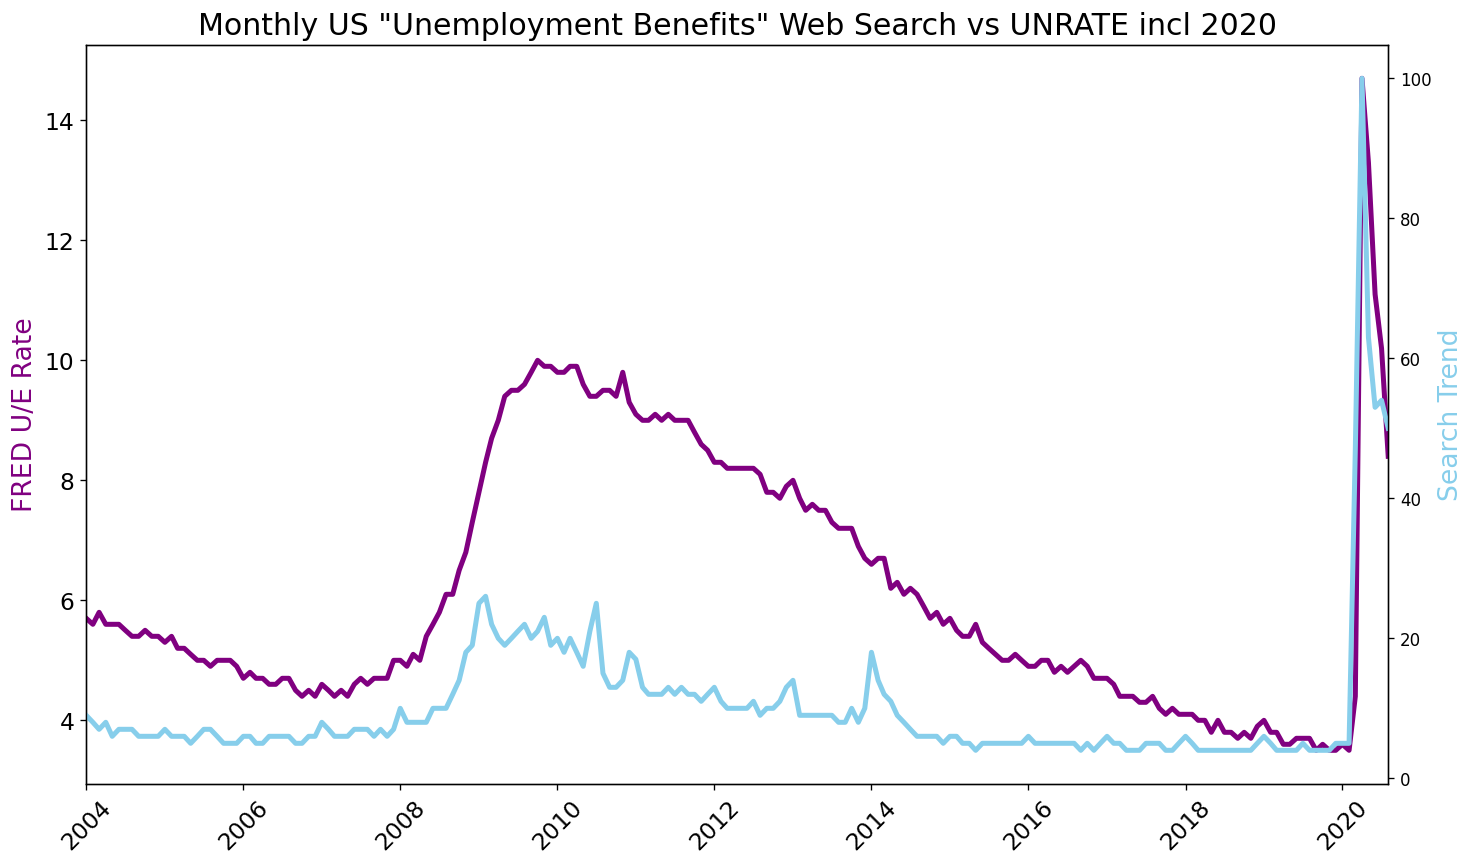

In [61]:
plt.figure(figsize=(14,8), dpi=120)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14, rotation=45)
plt.title('Monthly US "Unemployment Benefits" Web Search vs UNRATE incl 2020', fontsize=18)

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.set_ylabel('FRED U/E Rate', color='purple', fontsize=16)
ax2.set_ylabel('Search Trend', color='skyblue', fontsize=16)

ax1.set_xlim([df_ue_2020.MONTH.min(), df_ue_2020.MONTH.max()])

ax1.plot(df_ue_2020.MONTH, df_ue_2020.UNRATE, 'purple', linewidth=3)
ax2.plot(df_ue_2020.MONTH, df_ue_2020.UE_BENEFITS_WEB_SEARCH, 'skyblue', linewidth=3)

plt.show()